# WeatherPy
----

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_data_folder = "output_data/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [59]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls

In [65]:
# ok let's see what we can do...
responseList = []
print('Beginning Data Retrieval...')
for city in cities:
    my_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    response = requests.get(my_url).json()
    if response['cod'] == '404':
        print('City not found. Skipping.')
    else:
        responseList.append(response)
        print('City ' + str(cities.index(city)) + ': ' + city)
print('Data Retrieval Complete!')

Beginning Data Retrieval...
City 0: ushuaia
City 1: doha
City 2: jamestown
City 3: huittinen
City 4: gawler
City 5: sur
City 6: victoria
City 7: taurage
City 8: talnakh
City 9: hobart
City 10: bredasdorp
City 11: ribeira grande
City 12: flinders
City 13: lavrentiya
City not found. Skipping.
City 15: huangyan
City not found. Skipping.
City 17: kahului
City 18: port alfred
City 19: mataura
City not found. Skipping.
City 21: rikitea
City 22: itacare
City 23: warsaw
City 24: wolomin
City 25: arraial do cabo
City 26: hermanus
City 27: agadez
City 28: bluff
City 29: provideniya
City 30: yuanli
City 31: vila franca do campo
City 32: port elizabeth
City not found. Skipping.
City 34: punta arenas
City 35: barrow
City 36: lompoc
City 37: rochegda
City not found. Skipping.
City 39: dandong
City 40: bonavista
City 41: port hedland
City 42: faanui
City 43: hilo
City 44: dingle
City 45: koslan
City 46: alihe
City 47: galesong
City 48: yumen
City 49: new norfolk
City 50: yatou
City 51: astoria
City 5

City 411: orange cove
City 412: lata
City 413: buala
City 414: uvat
City 415: hofn
City not found. Skipping.
City 417: baracoa
City 418: zabol
City 419: port hueneme
City 420: moerai
City 421: pozo colorado
City 422: laguna
City 423: nikolayevka
City 424: lexington
City 425: ulfborg
City 426: oakham
City 427: eydhafushi
City 428: norton shores
City 429: hetauda
City 430: chifeng
City 431: wuwei
City 432: dera bugti
City 433: abu kamal
City 434: honiara
City 435: krasnouralsk
City 436: pedernales
City 437: tiznit
City 438: mackenzie
City 439: port macquarie
City 440: nouadhibou
City 441: nampula
City 442: la asuncion
City not found. Skipping.
City 444: solnechnyy
City 445: nelson bay
City 446: aleksandrov gay
City 447: baker city
City 448: portland
City 449: salalah
City 450: horsham
City not found. Skipping.
City 452: fukue
City 453: xichang
City 454: egvekinot
City 455: hauge
City 456: ilulissat
City not found. Skipping.
City 458: pevek
City 459: pacific grove
City 460: salisbury
City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
# to put everything into a DataFrame, first the important info needs to be put into lists
# below are the empty lists
latList = []
longList = []
maxTempList = []
humidityList = []
windList = []
cities2 = []
cloudList = []
countriesList = []
datetimeList = []

# loop through the responseList to get the data out of each response dictionary
for response in responseList:
    lat = response['coord']['lat']
    long = response['coord']['lon']
    maxTemp = response['main']['temp_max']
    humidity = response['main']['humidity']
    windSpeed = response['wind']['speed']
    city = response['name']
    clouds = response['clouds']['all']
    country = response['sys']['country']
    dateTime = response['dt']
    
    
    # convert maxTemp from K to F
    maxTemp = (maxTemp - 273.15) * 1.8 + 32
    # It turns out this makes some pretty long decimal values so let's round to the nearest tenth
    maxTemp = round(maxTemp, 1)
    
    # append all the extracted data to the corresponding list
    latList.append(lat)
    longList.append(long)
    maxTempList.append(maxTemp)
    humidityList.append(humidity)
    windList.append(windSpeed)
    cities2.append(city)
    cloudList.append(clouds)
    countriesList.append(country)
    datetimeList.append(dateTime)
    
# store all those lists in a dictionary then use the dictionary to create a DataFrame
weatherDict = {
    'City': cities2,
    'Country': countriesList,
    'datetime': datetimeList,
    'lat': latList,
    'long': longList,
    'Max Temp (F)': maxTempList,
    'Cloudiness': cloudList,
    'Humidity': humidityList,
    'Wind Speed': windList
}
weatherDF = pd.DataFrame(weatherDict)
weatherDF.head()
# wow the fifth city in my DataFrame is Dikson, Russia 
# I noticed the max temperature is only -14 F so I looked up the city on Wikipedia:
# "Dikson is the northernmost port in Russia and the northernmost settlement on the Asian continent."
# Pretty cool!

,City,Country,datetime,lat,long,Max Temp (F),Cloudiness,Humidity,Wind Speed
0,Ushuaia,AR,1644551152,-54.8000,-68.3000,44.3,40,81,12.86
1,Doha,QA,1644551347,25.2867,51.5333,64.3,0,85,1.54
2,Jamestown,US,1644551347,42.0970,-79.2353,32.1,100,59,3.09
3,Huittinen,FI,1644551348,61.1833,22.7000,28.0,11,92,3.16
4,Gawler,AU,1644551138,-34.6000,138.7333,83.1,28,34,3.44


In [69]:
# export to .csv
weatherDF.to_csv(path_or_buf=output_data_file)

In [71]:
weatherDF.describe().drop('datetime', axis=1)

,lat,long,Max Temp (F),Cloudiness,Humidity,Wind Speed
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,21.564980,16.029643,49.836735,53.150278,72.842301,3.385826
std,33.443931,90.357823,29.564008,41.083984,20.661711,2.505867
min,-54.800000,-179.166700,-35.300000,0.000000,11.000000,0.000000
25%,-6.860550,-62.172600,31.950000,6.000000,62.000000,1.555000
50%,28.366700,22.461700,57.400000,55.000000,77.000000,2.640000
75%,48.574950,91.024650,74.200000,98.000000,89.000000,4.615000
max,78.218600,179.316700,107.400000,100.000000,100.000000,15.070000


In [72]:
# Get the indices of cities that have humidity over 100%.
# None of them do (see the weatherDF description above), but here's how I would do it
indices = weatherDF.index
badIndices = indices[weatherDF['Humidity'] > 100]
badIndexList = badIndices.tolist()
print(badIndexList)

[]


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

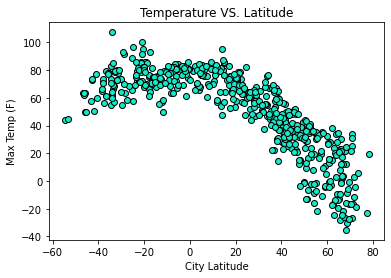

In [73]:
plt.scatter(weatherDF['lat'], weatherDF['Max Temp (F)'], edgecolors='black', c='xkcd:aqua')
plt.xlabel('City Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Temperature VS. Latitude')
filepath = f"{output_data_folder}temp_vs_lat.png"
plt.savefig(filepath)
plt.show()

## Humidity vs. Latitude Plot

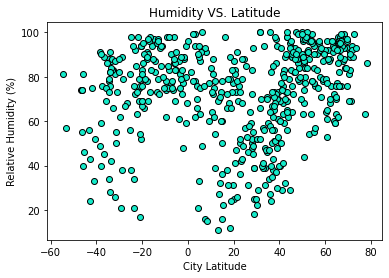

In [74]:
plt.scatter(weatherDF['lat'], weatherDF['Humidity'], edgecolors='black', c='xkcd:aqua')
plt.xlabel('City Latitude')
plt.ylabel('Relative Humidity (%)')
plt.title('Humidity VS. Latitude')
filepath = f"{output_data_folder}humidity_vs_lat.png"
plt.savefig(filepath)
plt.show()

## Cloudiness vs. Latitude Plot

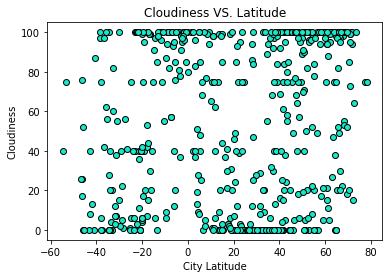

In [75]:
plt.scatter(weatherDF['lat'], weatherDF['Cloudiness'], edgecolors='black', c='xkcd:aqua')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness VS. Latitude')
filepath = f"{output_data_folder}cloudiness_vs_lat.png"
plt.savefig(filepath)
plt.show()

## Wind Speed vs. Latitude Plot

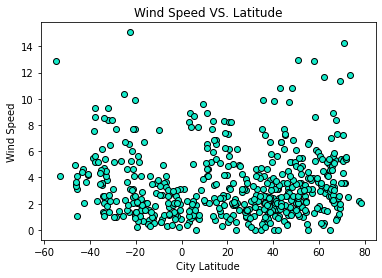

In [76]:
plt.scatter(weatherDF['lat'], weatherDF['Wind Speed'], edgecolors='black', c='xkcd:aqua')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed VS. Latitude')
filepath = f"{output_data_folder}wind_speed_vs_lat.png"
plt.savefig(filepath)
plt.show()

## Linear Regression

In [77]:
# create a new DF for only northern hemisphere
regressionDF = weatherDF[weatherDF['lat'] >= 0]
regressionDF.head()

,City,Country,datetime,lat,long,Max Temp (F),Cloudiness,Humidity,Wind Speed
1,Doha,QA,1644551347,25.2867,51.5333,64.3,0,85,1.54
2,Jamestown,US,1644551347,42.0970,-79.2353,32.1,100,59,3.09
3,Huittinen,FI,1644551348,61.1833,22.7000,28.0,11,92,3.16
5,Sur,OM,1644551349,22.5667,59.5289,69.4,0,50,1.88
6,Hong Kong,HK,1644551177,22.2855,114.1577,74.0,39,76,3.58


In [78]:
negRegressionDF = weatherDF[weatherDF['lat'] <= 0]
negRegressionDF.head()

,City,Country,datetime,lat,long,Max Temp (F),Cloudiness,Humidity,Wind Speed
0,Ushuaia,AR,1644551152,-54.8000,-68.3000,44.3,40,81,12.86
4,Gawler,AU,1644551138,-34.6000,138.7333,83.1,28,34,3.44
9,Hobart,AU,1644551252,-42.8794,147.3294,73.0,40,43,4.63
10,Bredasdorp,ZA,1644551351,-34.5322,20.0403,54.7,0,88,2.57
12,Flinders,AU,1644551352,-34.5833,150.8552,73.8,100,78,6.16


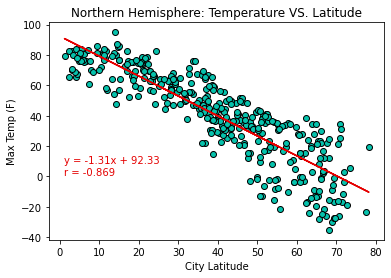

In [79]:
plt.scatter(regressionDF['lat'], regressionDF['Max Temp (F)'], c='xkcd:turquoise', edgecolors='black')
plt.xlabel('City Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere: Temperature VS. Latitude')

# do the regression...
slope, intercept, r, _, _ = linregress(regressionDF['lat'], regressionDF['Max Temp (F)'])

# add the fit line to the plot...
y_values = slope * regressionDF['lat'] + intercept
plt.plot(regressionDF['lat'], y_values, color='xkcd:red')
equation = f'y = {slope:.2f}x + {intercept:.2f}\nr = {r:.3f}'
plt.text(1, 1, equation, color='xkcd:red')
filepath = f"{output_data_folder}temp_regression_north.png"
plt.savefig(filepath)
plt.show()

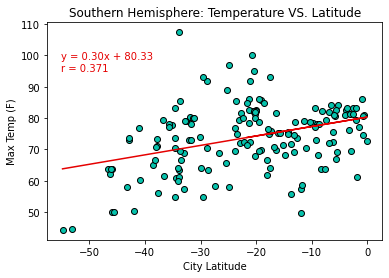

In [91]:
plt.scatter(negRegressionDF['lat'], negRegressionDF['Max Temp (F)'], c='xkcd:turquoise', edgecolors='black')
plt.xlabel('City Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere: Temperature VS. Latitude')

# do the regression...
slope, intercept, r, _, _ = linregress(negRegressionDF['lat'], negRegressionDF['Max Temp (F)'])

# add the fit line to the plot...
y_values = slope * negRegressionDF['lat'] + intercept
plt.plot(negRegressionDF['lat'], y_values, color='xkcd:red')
equation = f'y = {slope:.2f}x + {intercept:.2f}\nr = {r:.3f}'
plt.text(-55, 95, equation, color='xkcd:red')
filepath = f"{output_data_folder}temp_regression_south.png"
plt.savefig(filepath)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

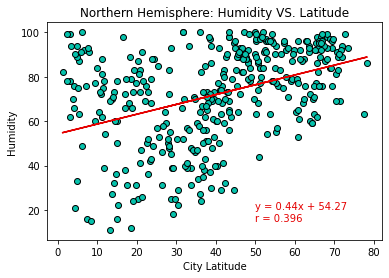

In [90]:
plt.scatter(regressionDF['lat'], regressionDF['Humidity'], c='xkcd:turquoise', edgecolors='black')
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity VS. Latitude')

# do the regression...
slope, intercept, r, _, _ = linregress(regressionDF['lat'], regressionDF['Humidity'])

# add the fit line to the plot...
y_values = slope * regressionDF['lat'] + intercept
plt.plot(regressionDF['lat'], y_values, color='xkcd:red')
equation = f'y = {slope:.2f}x + {intercept:.2f}\nr = {r:.3f}'
plt.text(50, 15, equation, color='xkcd:red')
filepath = f"{output_data_folder}humidity_regression_north.png"
plt.savefig(filepath)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

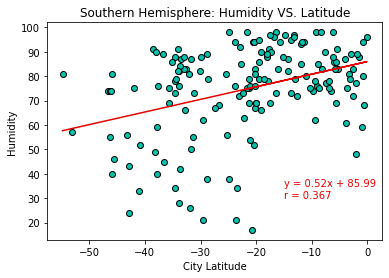

In [84]:
plt.scatter(negRegressionDF['lat'], negRegressionDF['Humidity'], c='xkcd:turquoise', edgecolors='black')
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity VS. Latitude')

# do the regression...
slope, intercept, r, _, _ = linregress(negRegressionDF['lat'], negRegressionDF['Humidity'])

# add the fit line to the plot...
y_values = slope * negRegressionDF['lat'] + intercept
plt.plot(negRegressionDF['lat'], y_values, color='xkcd:red')
equation = f'y = {slope:.2f}x + {intercept:.2f}\nr = {r:.3f}'
plt.text(-15, 30, equation, color='xkcd:red')
filepath = f"{output_data_folder}humidity_regression_south.png"
plt.savefig(filepath)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

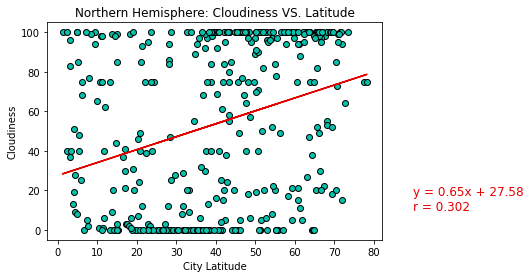

In [85]:
plt.scatter(regressionDF['lat'], regressionDF['Cloudiness'], c='xkcd:turquoise', edgecolors='black')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness VS. Latitude')

# do the regression...
slope, intercept, r, _, _ = linregress(regressionDF['lat'], regressionDF['Cloudiness'])

# add the fit line to the plot...
y_values = slope * regressionDF['lat'] + intercept
plt.plot(regressionDF['lat'], y_values, color='xkcd:red')
equation = f'y = {slope:.2f}x + {intercept:.2f}\nr = {r:.3f}'
plt.text(90, 10, equation, color='xkcd:red', fontsize='large')
filepath = f"{output_data_folder}cloudiness_regression_north.png"
plt.savefig(filepath)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

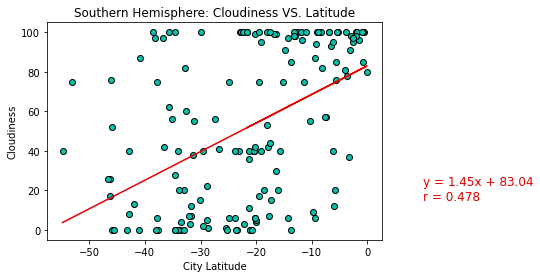

In [86]:
plt.scatter(negRegressionDF['lat'], negRegressionDF['Cloudiness'], c='xkcd:turquoise', edgecolors='black')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness VS. Latitude')

# do the regression...
slope, intercept, r, _, _ = linregress(negRegressionDF['lat'], negRegressionDF['Cloudiness'])

# add the fit line to the plot...
y_values = slope * negRegressionDF['lat'] + intercept
plt.plot(negRegressionDF['lat'], y_values, color='xkcd:red')
equation = f'y = {slope:.2f}x + {intercept:.2f}\nr = {r:.3f}'
plt.text(10, 15, equation, color='xkcd:red', fontsize='large')
filepath = f"{output_data_folder}cloudiness_regression_south.png"
plt.savefig(filepath)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

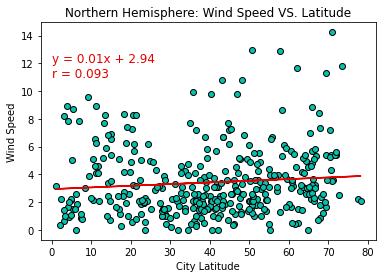

In [89]:
plt.scatter(regressionDF['lat'], regressionDF['Wind Speed'], c='xkcd:turquoise', edgecolors='black')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed VS. Latitude')

# do the regression...
slope, intercept, r, _, _ = linregress(regressionDF['lat'], regressionDF['Wind Speed'])

# add the fit line to the plot...
y_values = slope * regressionDF['lat'] + intercept
plt.plot(regressionDF['lat'], y_values, color='xkcd:red')
equation = f'y = {slope:.2f}x + {intercept:.2f}\nr = {r:.3f}'
plt.text(0, 11, equation, color='xkcd:red', fontsize='large')
filepath = f"{output_data_folder}wind_speed_regression_north.png"
plt.savefig(filepath)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

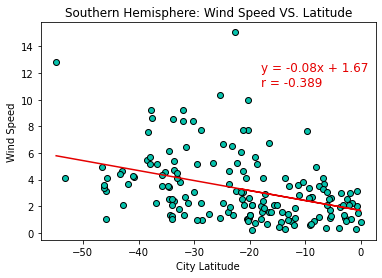

In [88]:
plt.scatter(negRegressionDF['lat'], negRegressionDF['Wind Speed'], c='xkcd:turquoise', edgecolors='black')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed VS. Latitude')

# do the regression...
slope, intercept, r, _, _ = linregress(negRegressionDF['lat'], negRegressionDF['Wind Speed'])

# add the fit line to the plot...
y_values = slope * negRegressionDF['lat'] + intercept
plt.plot(negRegressionDF['lat'], y_values, color='xkcd:red')
equation = f'y = {slope:.2f}x + {intercept:.2f}\nr = {r:.3f}'
plt.text(-18, 11, equation, color='xkcd:red', fontsize='large')
filepath = f"{output_data_folder}wind_speed_regression_south.png"
plt.savefig(filepath)
plt.show()

## Analysis
* There is a relatively strong (r = 0.869) inverse correlation between latitude and temperature in the northern hemisphere. This makes sense since it should be colder further from the equator. However, the correlation between latitude and temperature in the southern hemisphere is much less strong (r = 0.371). The data points are not clustered very closely around the trend line. This could be because there are not as many large continents south of the equator. The temp vs latitude graphs show no cities south of 60 degrees south latitude, while there are cities north of 80 degrees north latitude. If there were more land between 60 and 80 degrees south, the trend might be stronger. 
* There is a positive correlation between latitude and humidity. This is especially apparent in the northern hemisphere. Because it is currently winter in the northern hemisphere, the temperatures are much lower farther north. The humidity information shows relative humidity, which is dependent on temperature. It is a percentage of the maximum amount of water dissolved in the air. Because cold air can hold much less water, any moisture in the air will have a greater impact on the relative humidity than it would for warm air. Even though there is probably much less moisture in the air in an absolute sense, the relative humidity can be quite high. 
* The windspeed graph shows local minima and maxima. Winds are stronger between 0 and 20 degrees north, and there are weaker winds north and south - from about 20 to 40 degrees and 0 to -15 degrees. Farther north than 40 and farther south than -15, the winds are much stronger. This is likely due to global wind patterns - the weaker winds on either side of the center peak are probably the "doldrums" - certain latitudes with much less wind. 